<a href="https://colab.research.google.com/github/camilotayac/computational_chemistry-TC/blob/master/Colab/RMSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧙‍♂️ Calculating the root mean square fluctuation over a trajectory ♾️ Cálculo de la fluctuación de la raíz cuadrática media (RMSF) a lo largo de una trayectoria

🐉 **@Tyac**

🏦 **Universidad de Caldas**

🌇 **Manizales - Colombia**

In [ ]:
# @title ## 🟢  Installation of programs and import of required libraries ♾️ Instalación de programas e importación de librerías necesarias
## MDAnalysis
!pip install --upgrade MDAnalysis
!pip install --upgrade MDAnalysis[analysis]
!pip install matplotlib
import MDAnalysis as mda
import MDAnalysis as mda
from MDAnalysis.analysis import rms, align
# import nglview as nv

import warnings
# suppress some MDAnalysis warnings about writing PDB files
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

## Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42



In [ ]:
# @title ## 📁 Files for analysis ♾️ Archivos para el análisis
# @markdown ### **🇺🇸** - Select whether you will work with tutorial files or with your own files
# @markdown ### **🇪🇸** - Seleccione si va a trabajar con archivos del tutorial o con archivos propios
files = 'Own files - Archivos propios'# @param ['Tutorial files - Archivos del tutorial', 'Own files - Archivos propios']
# @markdown #### 🔴 **🇺🇸 - Note:** add the address of your folder, example: ***folder_a*** or ***folder_a/folder_b***
# @markdown #### 🔴 **🇪🇸 - Nota:** agregue la dirección de su carpeta, ejemplo: ***carpeta_a*** o ***carpeta_a/carpeta_b***
drive_folder_path = "MD/C" #@param {type:"string"}

if files == 'Tutorial files - Archivos del tutorial':
  %cd /content
  !git clone https://github.com/camilotayac/computational_chemistry-TC.git
  %cd computational_chemistry-TC/Examples
elif files == 'Own files - Archivos propios':
  from google.colab import drive
  drive.mount('/content/drive')
  carpeta = "/content/drive/MyDrive/" + drive_folder_path
  %cd {carpeta}

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/MD/C


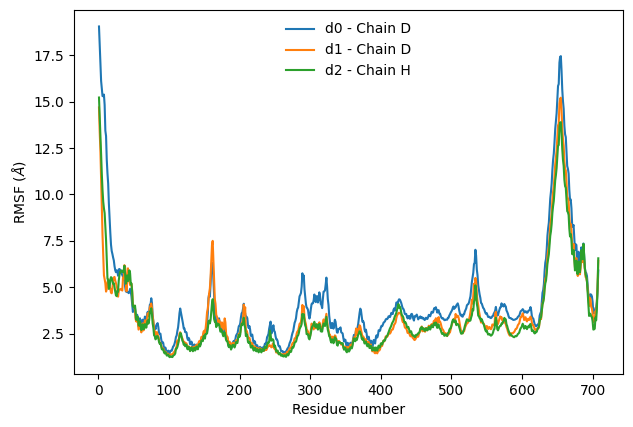

In [4]:
# @title ## 🟢 Variables for analysis ♾️ Variables para análisis

# @markdown ### **🇺🇸** - **File name(s) without extension**
# @markdown ### **🇺🇸** - **🔴 NOTE:** Remember if you are going to use several files, separate them with **( ; )**
# @markdown ### **🇺🇸** - **🔴 NOTE:** Remember that the files must be in ***PDB*** and ***XTC*** format.
# @markdown ### **🇪🇸** - **Nombre del o los archivos sin extensión**
# @markdown ### **🇪🇸** - **🔴 NOTA:** Recuarda si vas a usar varios archivos, separalos con **( ; )**
# @markdown ### **🇪🇸** - **🔴 NOTA:** Recuarda que los archivos deben estar en formato ***PDB*** y  ***XTC***

file_name = "d0;d1;d2" # @param {type:"string"}
file_name = file_name.split(";")

universes = {}
universes_list = []
for name in file_name:
    topologia = f"{name}.pdb"
    trayectoria = f"{name}.xtc"
    try:
        universe = mda.Universe(topologia, trayectoria)
        universes[name] = universe
        universes_list.append(universe)
    except Exception as e:
        print(f"Error loading {name}: {e}")


# @markdown ---

# @markdown ### **🇺🇸** - Select whether to work ***All Atom*** or ***Coarse Grain***
# @markdown ### **🇪🇸** - Seleccioné si va trabjar ***All Atom*** o ***Grano Grueso***
atom ="Coarse Grain" # @param ["All Atom", "Coarse Grain"]

if atom == "All Atom":
  atom = "CA"
elif atom == "Coarse Grain":
  atom = "BB"

# @markdown ---

# @markdown ### **🇺🇸** - Number of DPI for the image
# @markdown ### **🇪🇸** - Número de DPI para la imagen

dpi = 500 # @param {type:"slider", min:100, max:1000, step:100}

# @markdown ---

# @markdown ### **🇺🇸** - **Chain IDs to analyze**
# @markdown ### **🇺🇸** - **🔴 NOTE:** Separate multiple chains with **( ; )** (e.g., A;B;D)
# @markdown ### **🇪🇸** - **Identificadores de cadena a analizar**
# @markdown ### **🇪🇸** - **🔴 NOTA:** Separa múltiples cadenas con **( ; )** (ej: A;B;D)
chain_ids = "D;D;H" # @param {type:"string"}
chain_ids = chain_ids.split(";")

# @markdown ---

# @markdown ### **🇺🇸** - **Residue range to analyze**
# @markdown ### **🇺🇸** - **🔴 NOTE:** Use format **start:end** (e.g., 1:100)
# @markdown ### **🇺🇸** - **🔴 TIP:** Verify range exists in your PDB structure
# @markdown ### **🇪🇸** - **Rango de residuos a analizar**
# @markdown ### **🇪🇸** - **🔴 NOTA:** Usa formato **inicio:fin** (ej: 1:100)
# @markdown ### **🇪🇸** - **🔴 CONSEJO:** Verifica el rango en tu estructura PDB
residue_range = "1:708" # @param {type:"string"}

# Configurar tamaño de figura (180mm x 120mm convertidos a pulgadas)
plt.figure(figsize=(180/25.4, 120/25.4))

for i, universe in enumerate(universes_list):
    chain_id = chain_ids[i]
    c_alphas = universe.select_atoms(f'protein and name {atom} and resid {residue_range} and chainid {chain_id}')

    if len(c_alphas) == 0:
        print(f"Skipping trajectory {i+1} - no atoms found for Chain {chain_id} in the specified residue range.")
        continue

    average = align.AverageStructure(universe, universe,
              select=f'protein and name {atom} and resid {residue_range} and chainid {chain_id}',
              ref_frame=0).run()
    ref = average.results.universe

    aligner = align.AlignTraj(universe, ref,
              select=f'protein and name {atom} and resid {residue_range} and chainid {chain_id}',
              in_memory=True).run()

    R = rms.RMSF(c_alphas).run()

    # Graficar con etiqueta que incluye nombre de archivo y cadena
    plt.plot(c_alphas.resids, R.results.rmsf,
             label=f'{file_name[i]} - Chain {chain_id}')

    # Guardar PDB con tempfactors
    universe.add_TopologyAttr('tempfactors')
    protein = universe.select_atoms('protein')
    for residue, r_value in zip(protein.residues, R.results.rmsf):
        residue.atoms.tempfactors = r_value
    universe.atoms.write(f'rmsf_tempfactors_{file_name[i]}_Chain_{chain_id}.pdb')

# Configuraciones finales del gráfico
plt.xlabel('Residue number')
plt.ylabel('RMSF ($\AA$)')
plt.legend(loc='best', frameon=False)  # Leyenda con colores

# Guardar figuras con nombre que incluye cadenas usadas
plt.savefig(f'RMSF_result.pdf',
           format="pdf", transparent=True, dpi=dpi, bbox_inches='tight')
plt.savefig(f'RMSF_result.svg',
           format="svg", transparent=True, dpi=dpi, bbox_inches='tight')
plt.savefig(f'RMSF_result.png',
           format="png", transparent=True, dpi=dpi, bbox_inches='tight')

plt.show()


 ## 🟢 Bibliography ♾️ Bibliografía
---

### **🇺🇸** - This Colab was based on the tutorials by [MDAnalysis](https://userguide.mdanalysis.org/stable/index.html). Please contact MDAnalysis for quotation

### **🇪🇸** - Este Colab se basó en los tutoriales de [MDAnalysis](https://userguide.mdanalysis.org/stable/index.html). Por favor dirigirse a MDAnalysis para citar



* #### [Calculating the root mean square fluctuation over a trajectory](https://userguide.mdanalysis.org/stable/examples/analysis/alignment_and_rms/rmsf.html)
